In [12]:
import sys
sys.path.append('..')
import processing
import models
import torch.optim as optim
import torch.nn as nn
import numpy as np
# import math
import torch
import json
import configs.common as cc


In [14]:
loader = processing.DatasetLoader('/home/s203861/midi-classical-music/np_data/data')
train_data, test_data = loader.get_dataloaders()

In [15]:
total = torch.tensor([], device='cuda')
for batch_idx, (src, trg, meta) in enumerate(train_data):
    total = torch.concat((total, src.flatten()))

In [16]:
len(total)

4612096

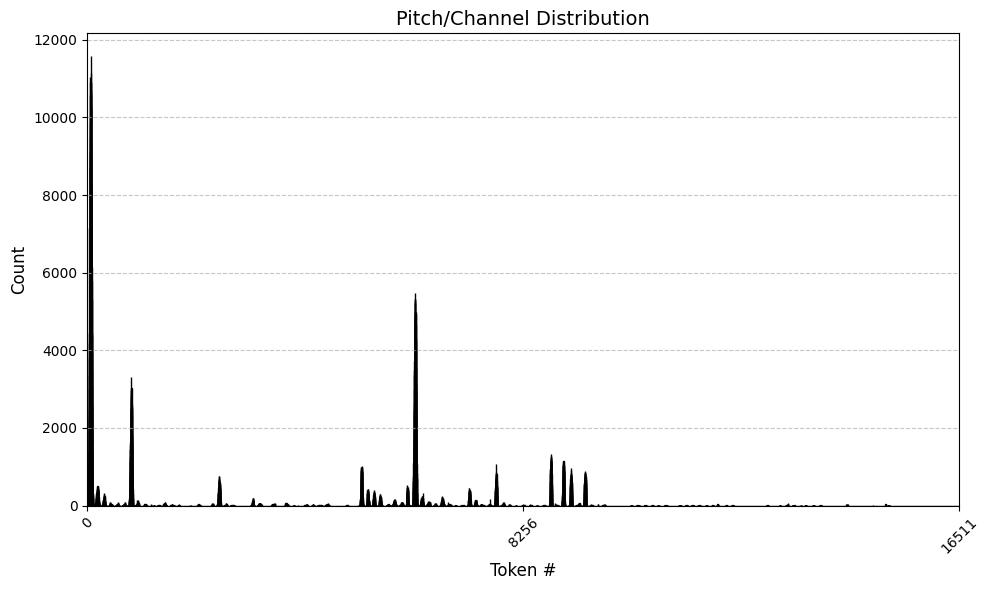

In [69]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Assume total and cc are defined
flattened_tensor = total.int()
bins = cc.vocab_size
hist = torch.histc(flattened_tensor, bins=bins, min=0, max=cc.vocab_size)

# Define the range you want to display
x_min = cc.start_idx['pitch']
x_max = cc.start_idx['dyn'] - 1

# Slice histogram and x values
x_vals = range(x_min, x_max)
hist_slice = hist[x_min:x_max].cpu().int().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, hist_slice, width=1, align='center', color='skyblue', edgecolor='black')
plt.xlim(x_min, x_max)
plt.xlabel('Token #', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Pitch/Channel Distribution', fontsize=14)
# plt.xticks(np.linspace(x_min, x_max-1, num=10), fontsize=10, rotation=45)
plt.xticks([x_min, np.mean([x_min, x_max]).round(), x_max], rotation=45)
# plt.xticks(ticks=np.append(np.arange(x_min, x_max, step=10), x_max), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

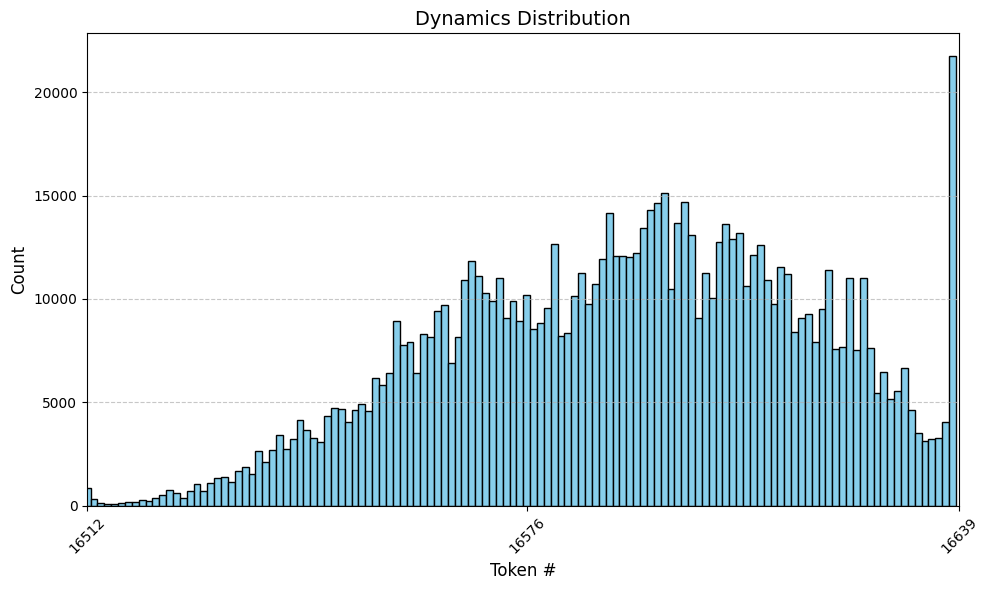

In [70]:
# Define the range you want to display
x_min = cc.start_idx['dyn']
x_max = cc.start_idx['length'] - 1

# Slice histogram and x values
x_vals = range(x_min, x_max)
hist_slice = hist[x_min:x_max].cpu().int().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, hist_slice, width=1, align='center', color='skyblue', edgecolor='black')
plt.xlim(x_min, x_max)
plt.xlabel('Token #', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Dynamics Distribution', fontsize=14)
plt.xticks([x_min, np.mean([x_min, x_max]).round(), x_max], rotation=45)
# plt.xticks(ticks=np.append(np.arange(x_min, x_max, step=10), x_max), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

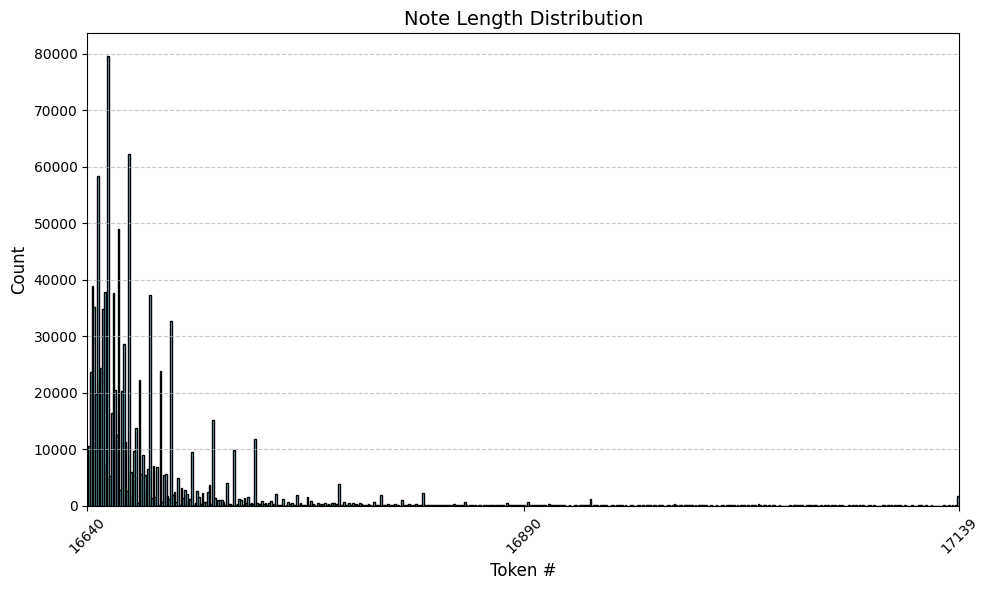

In [71]:
# Define the range you want to display
x_min = cc.start_idx['length']
x_max = cc.start_idx['time'] - 1

# Slice histogram and x values
x_vals = range(x_min, x_max)
hist_slice = hist[x_min:x_max].cpu().int().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, hist_slice, width=1, align='center', color='skyblue', edgecolor='black')
plt.xlim(x_min, x_max)
plt.xlabel('Token #', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Note Length Distribution', fontsize=14)
plt.xticks([x_min, np.mean([x_min, x_max]).round(), x_max], rotation=45)
# plt.xticks(ticks=np.append(np.arange(x_min, x_max, step=10), x_max), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

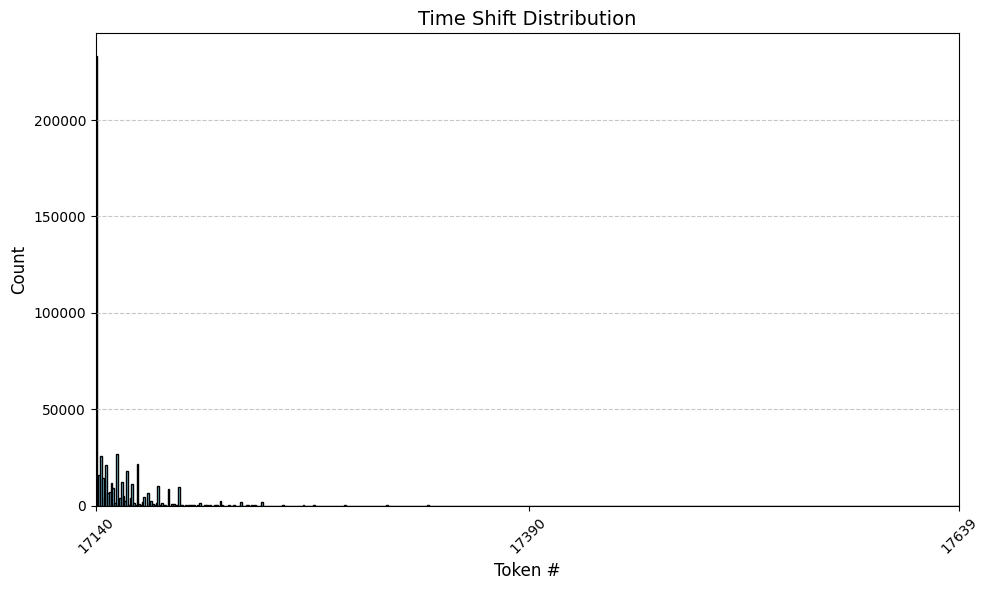

In [72]:
# Define the range you want to display
x_min = cc.start_idx['time']
x_max = cc.start_idx['tempo'] - 1

# Slice histogram and x values
x_vals = range(x_min, x_max)
hist_slice = hist[x_min:x_max].cpu().int().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, hist_slice, width=1, align='center', color='skyblue', edgecolor='black')
plt.xlim(x_min, x_max)
plt.xlabel('Token #', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Time Shift Distribution', fontsize=14)
plt.xticks([x_min, np.mean([x_min, x_max]).round(), x_max], rotation=45)
# plt.xticks(ticks=np.append(np.arange(x_min, x_max, step=10), x_max), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

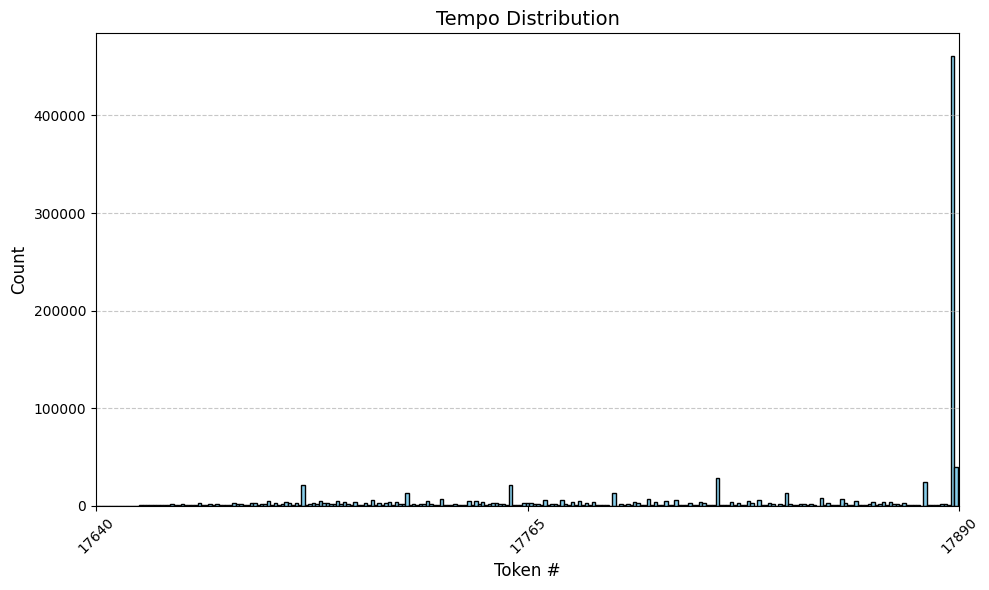

In [75]:
# Define the range you want to display
x_min = cc.start_idx['tempo']
x_max = cc.vocab_size

# Slice histogram and x values
x_vals = range(x_min, x_max)
hist_slice = hist[x_min:x_max].cpu().int().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, hist_slice, width=1, align='center', color='skyblue', edgecolor='black')
plt.xlim(x_min, x_max)
plt.xlabel('Token #', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Tempo Distribution', fontsize=14)
plt.xticks([x_min, np.mean([x_min, x_max]).round(), x_max], rotation=45)
# plt.xticks(ticks=np.append(np.arange(x_min, x_max, step=10), x_max), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

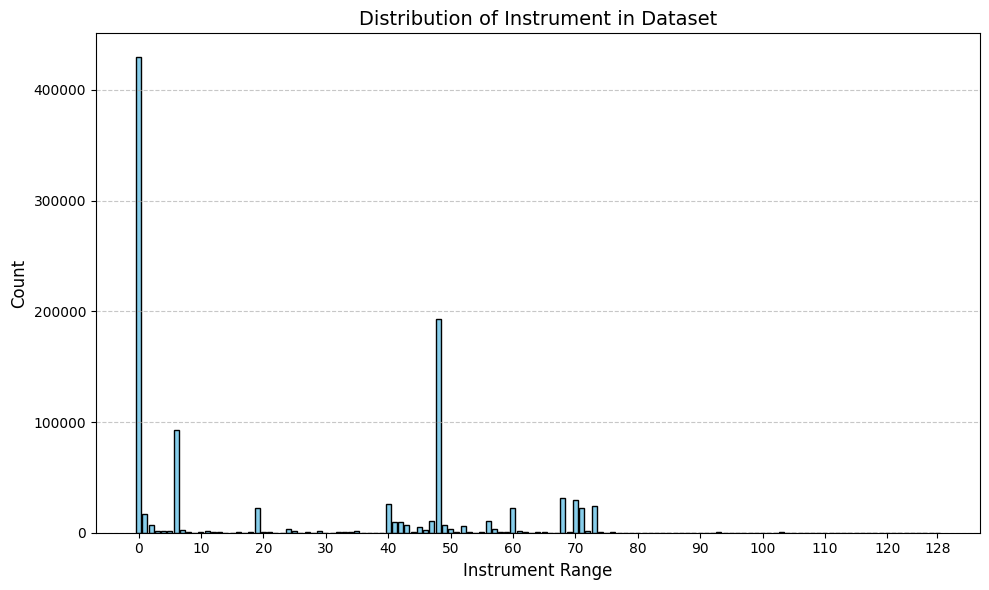

In [52]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Assume total and cc are defined
flattened_tensor = total.int()
bins = cc.vocab_size
hist = torch.histc(flattened_tensor, bins=bins, min=0, max=cc.vocab_size)

# Define your original range of interest
x_min = cc.start_idx['pitch']
x_max = cc.start_idx['dyn'] - 1

# Select the slice you care about
hist_slice = hist[x_min:x_max].cpu().int().numpy()

# Further bin into groups of 128
bin_size = 128
num_super_bins = (len(hist_slice) + bin_size - 1) // bin_size  # ceiling division

super_bins = [
    hist_slice[i*bin_size:(i+1)*bin_size].sum()
    for i in range(num_super_bins)
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(num_super_bins), super_bins, color='skyblue', edgecolor='black')
plt.xlabel('Instrument Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Instrument in Dataset', fontsize=14)

# Set custom x-ticks
plt.xticks(ticks=np.append(np.arange(0, 128, step=10), 128), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [21]:
import numpy as np

# Convert super_bins to numpy array for argsort
super_bins_array = np.array(super_bins)

# Get the indices of the top 5 bins (sorted descending)
top5_indices = super_bins_array.argsort()[-5:][::-1]

# Print top 5 bins and their labels
for idx in top5_indices:
    print(f"Label: {super_bin_labels[idx]}, Count: {super_bins[idx]}")

Label: 0-127, Count: 428574
Label: 6144-6271, Count: 200038
Label: 768-895, Count: 105410
Label: 8704-8831, Count: 32086
Label: 8960-9087, Count: 30630


In [4]:
import os
data_root = "/home/s203861/midi-classical-music/np_data/data"
band_folders = [d for d in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, d))]
band_folders = sorted(band_folders, reverse=True)
composers = {}
for band in band_folders:
    model_folder = os.path.join(data_root, band)
    # Count only files (not directories) in the folder
    num_files = sum([os.path.isfile(os.path.join(model_folder, f)) for f in os.listdir(model_folder)])
    composers[band] = num_files

In [11]:
dict(sorted(composers.items(), key=lambda item: item[1], reverse=True))

{'Bach': 887,
 'Unknown_artist': 708,
 'Scarlatti': 692,
 'Mozart': 254,
 'Beethoven': 246,
 'Haendel': 193,
 'Chopin': 135,
 'Schubert': 133,
 'Vivaldi': 106,
 'Haydn': 91,
 'Clementi': 61,
 'Brahms': 60,
 'Schumann': 59,
 'Mendelsonn': 53,
 'Burgmuller': 53,
 'Rachmaninov': 34,
 'Skriabin': 31,
 'German': 31,
 'Liszt': 28,
 'Czerny': 26,
 'Heller': 24,
 'Paganini': 22,
 'Satie': 21,
 'Albeniz': 20,
 'Debussy': 17,
 'Tchaikovsky': 16,
 'Faure': 16,
 'Grieg': 15,
 'Dvorak': 15,
 'Bartok': 15,
 'Ravel': 14,
 'Vaughan': 13,
 'Poulenc': 13,
 'Stravinsky': 12,
 'Rothchild': 12,
 'Joplin': 12,
 'Hummel': 12,
 'Holst': 12,
 'Gershwin': 12,
 'Cramer': 12,
 'Chaminade': 12,
 'Buxehude': 12,
 'Lemire': 11,
 'Diabelli': 11,
 'Mendelssohn': 10,
 'Jensen': 10,
 'Ginastera': 10,
 'Alkan': 10,
 'Shostakovich': 9,
 'Kuhlau': 9,
 'Busoni': 9,
 'Pachelbel': 8,
 'Chabrier': 8,
 'Sibelius': 7,
 'Saint': 7,
 'Coates': 7,
 'Lange': 6,
 'Griffes': 6,
 'Copland': 6,
 'Bizet': 5,
 'Wagner': 4,
 'Strauss_j': 4